In [94]:
%matplotlib notebook
%matplotlib inline
import numpy as np, pandas as pd
from matplotlib import pyplot as plt

In [95]:
files=!ls *.txt 
print(files)

['IspraHome-Day-0630ToXXXX-20160908.txt', 'IspraHome-Day-1000ToXXXX-20160907.txt', 'IspraHome-Night-2100To1000-20160906.txt', 'IspraHome-Night-2100ToXXXX-20160908.txt']


In [119]:
import io
import re

old_re = re.compile(r'cpm = (\d+)')
new_re = re.compile(r'.*cpm=(\d+), clicks=(\d+).*')
def parse_click_line(l):
    m = new_re.match(l)
    if m: 
        return int(m.group(2))
    m = old_re.search(l)
    if m: 
        return int(m.group(1)) / 6

def read_clicks(file):
    with io.open(file, 'rt') as fd:
        lines = (parse_click_line(l) for l in fd if l)
        return np.fromiter((l for l in lines if l), float)

#read_clicks(files[0])
file_clicks = {f: read_clicks(f) for f in files}
#file_clicks

In [120]:
from datetime import datetime
fname_re = re.compile(r'-(\d{4})to.+-(\d{8})', re.I)
def parse_fname_time(file):
    m = fname_re.search(file)
    if m:
        tm = '%s%s' %(m.group(2), m.group(1))
        tm = datetime.strptime(tm, '%Y%m%d%H%M')
        return tm

    
file_times = {f: parse_fname_time(f) for f in files}
file_times = {k:v for k,v in file_times.items() if v}
file_times

{'IspraHome-Day-0630ToXXXX-20160908.txt': datetime.datetime(2016, 9, 8, 6, 30),
 'IspraHome-Day-1000ToXXXX-20160907.txt': datetime.datetime(2016, 9, 7, 10, 0),
 'IspraHome-Night-2100To1000-20160906.txt': datetime.datetime(2016, 9, 6, 21, 0),
 'IspraHome-Night-2100ToXXXX-20160908.txt': datetime.datetime(2016, 9, 8, 21, 0)}

In [121]:
def zipdict(*dcts):
    for i in set(dcts[0]).intersection(*dcts[1:]):
            yield (i, tuple(d[i] for d in dcts))
file_data = zipdict(file_times, file_clicks)
file_data = sorted(file_data, key=lambda v: v[1][0])

In [122]:
#pd.DataFrame()
def file_df(fname, stime, clicks):
    ix = pd.date_range(stime, periods=clicks.size, freq='10S')
    sr = pd.Series(clicks, index=ix)
    sr.name = fname
    return sr

f_srs = [file_df(f, stime, clicks) 
         for f, (stime, clicks) in file_data]
df = pd.concat(f_srs, axis=1)

In [117]:
#dates.AutoDateLocator?
#dates.HourLocator?


D:\Apps\WinPython-64bit-3.5.2.1\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=60).mean()


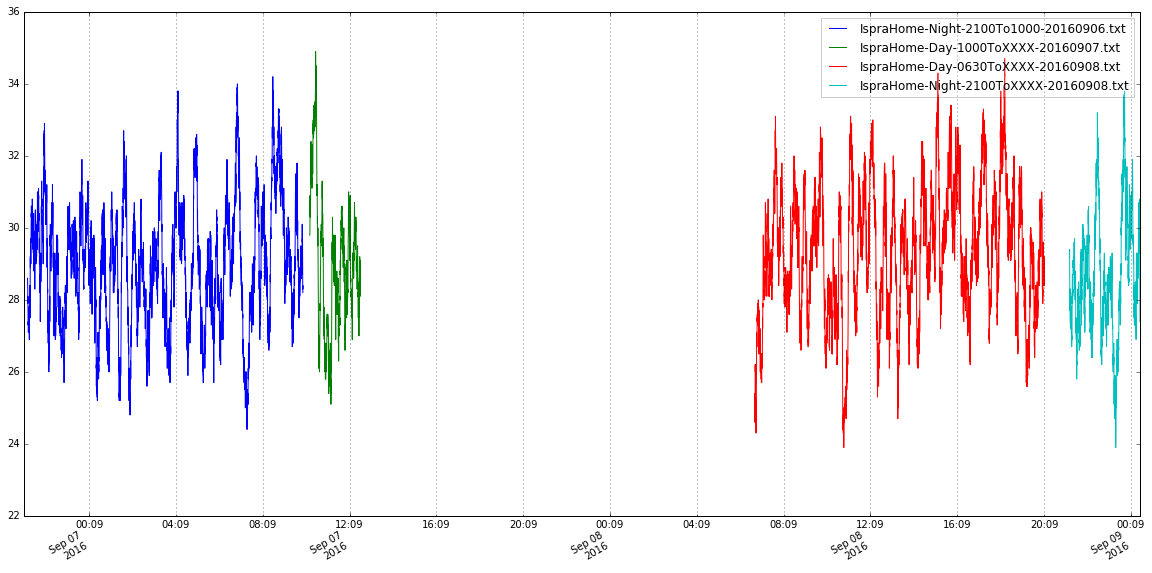

In [123]:
import matplotlib.dates as dates

smooth_nsamples = 60 # 60-->10min
#plt.plot(pd.rolling_mean(clicks, 60)*6, '+')
df2 = pd.rolling_mean(df, smooth_nsamples) * 6
ax = df2.plot(figsize=(20, 10));
ax.legend(framealpha=0.2);
# From http://stackoverflow.com/a/13674286/548792
ax.xaxis.set_minor_locator(dates.AutoDateLocator())
ax.xaxis.set_minor_locator(dates.HourLocator(range(0, 24, 4)))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%m'))
ax.xaxis.set_major_locator(dates.HourLocator(range(0, 24, 12)))
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%b %d\n%Y'))
ax.xaxis.grid(True, which="minor")


ddsfds

dsf

ds

dsf

dsf

sdf

sf

df

dsf

sdf

ds

fd

fsdf

sdf

dsf

dsf

sd

d